# LSTM Time Series - Stock Price Prediction
## Part 1 - Data Explanatory Analysis
This notebook focuses on examining the raw dataset containing daily historical prices of Google stocks. The goal is to identify a specific timeframe suitable for further analysis and prediction using LSTM.

> **INPUT**: The raw data file of all available stock prices of Google (Alphabet Inc.), as downloaded from its original source. <br/>
> **OUTPUT**: The extracted historical data of the targeted period for analysis, stored in an intermediary location for next steps.

### 1. INITIALIZATION

In [10]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

### 2. LOAD DATASET FILE

The dataset we are going to initially load and explore is the historical records of daily price details of Google (Alphabet Inc.) sourced from [Yahoo Finance](https://finance.yahoo.com/quote/GOOG).

At first, we load the complete dataset available spanning a period from 2004-08-19 up until the time of creating this script.

The main objective of loading the entire dataset is to choose a particular time frame for analysis.

In [7]:
import yfinance as yf

stock_data = yf.download("GOOGL", start='2004-08-19', end='2023-12-31')
stock_data.columns = stock_data.columns.droplevel(1)
stock_data


*********************100%***********************]  1 of 1 completed

Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2004-08-19 00:00:00+00:00,2.501941,2.511011,2.604104,2.401401,2.502503,893181924
2004-08-20 00:00:00+00:00,2.700670,2.710460,2.729730,2.515015,2.527778,456686856
2004-08-23 00:00:00+00:00,2.727849,2.737738,2.839840,2.728979,2.771522,365122512
2004-08-24 00:00:00+00:00,2.614895,2.624374,2.792793,2.591842,2.783784,304946748
2004-08-25 00:00:00+00:00,2.643072,2.652653,2.702703,2.599600,2.626627,183772044
...,...,...,...,...,...,...
2023-12-22 00:00:00+00:00,140.978943,141.490005,141.990005,140.710007,140.770004,26514600
2023-12-26 00:00:00+00:00,141.008835,141.520004,142.679993,141.190002,141.589996,16780300
2023-12-27 00:00:00+00:00,139.862976,140.369995,142.080002,139.889999,141.589996,19628600


In [8]:
stock_data.to_csv('google_stock_price_full.csv')

In [11]:
# Prepare data file location and load the dataset
data_file_location = "..\\data\\raw\\"
data_file_name = "google_stock_price_full"
data_file_ext = "csv"

# Load data file
data = pd.read_csv(data_file_location + data_file_name + "." + data_file_ext)

In [12]:
# Check dataset shape
data.shape

(4875, 7)

In [13]:
# Check dataset head
data.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,2004-08-19 00:00:00+00:00,2.501941,2.511011,2.604104,2.401401,2.502503,893181924
1,2004-08-20 00:00:00+00:00,2.700670,2.710460,2.729730,2.515015,2.527778,456686856
2,2004-08-23 00:00:00+00:00,2.727849,2.737738,2.839840,2.728979,2.771522,365122512
3,2004-08-24 00:00:00+00:00,2.614895,2.624374,2.792793,2.591842,2.783784,304946748
4,2004-08-25 00:00:00+00:00,2.643072,2.652653,2.702703,2.599600,2.626627,183772044


In [5]:
# Check data types
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

### 3. INITIAL DATA CLEANING

As we notice, the Date column is currently in a String format which requires conversion to proper Datetime format.

In [15]:
# Convert Date column to a valid Datetime format
data["Date"] = pd.to_datetime(data["Date"])

In [16]:
# Check column format
data.dtypes

Date         datetime64[ns, UTC]
Adj Close                float64
Close                    float64
High                     float64
Low                      float64
Open                     float64
Volume                     int64
dtype: object

### 4. EXPLORE DATASET

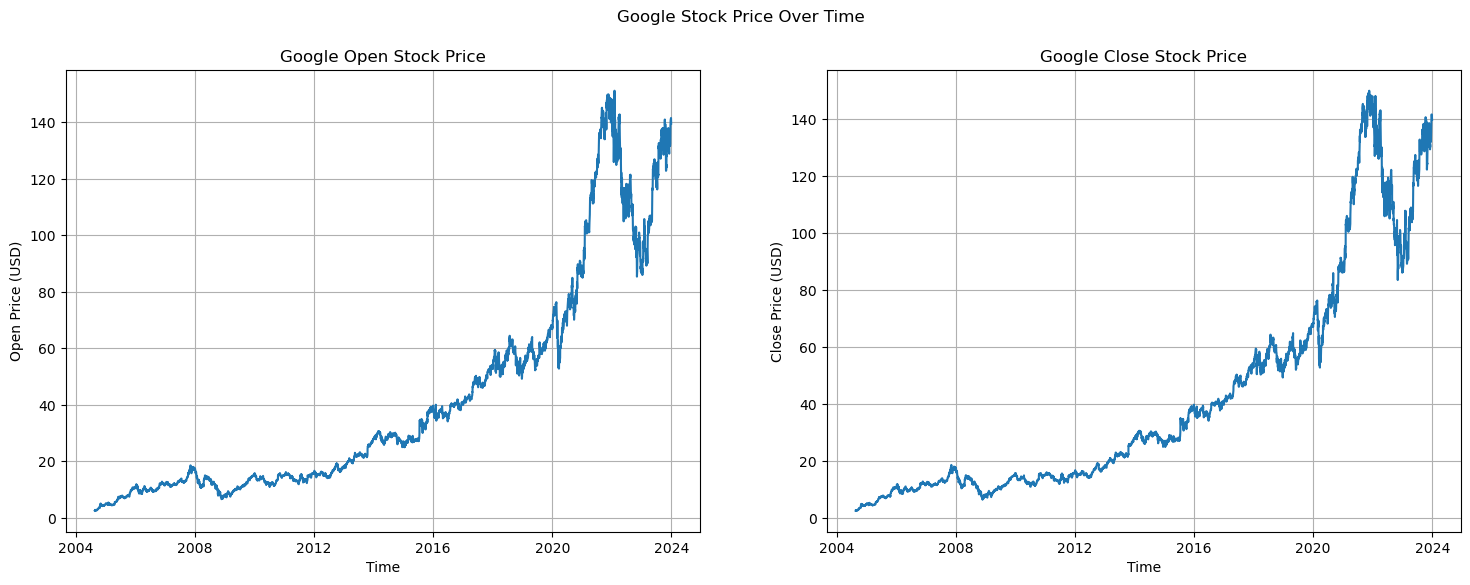

In [17]:
# Plot Open and Close price for the whole period
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
plt.plot(data["Date"], data["Open"])
plt.xlabel("Time")
plt.ylabel("Open Price (USD)")
plt.title("Google Open Stock Price")
plt.grid()

plt.subplot(1,2,2)
plt.plot(data["Date"], data["Close"])
plt.xlabel("Time")
plt.ylabel("Close Price (USD)")
plt.title("Google Close Stock Price")
plt.grid()

plt.suptitle("Google Stock Price Over Time")
plt.show()

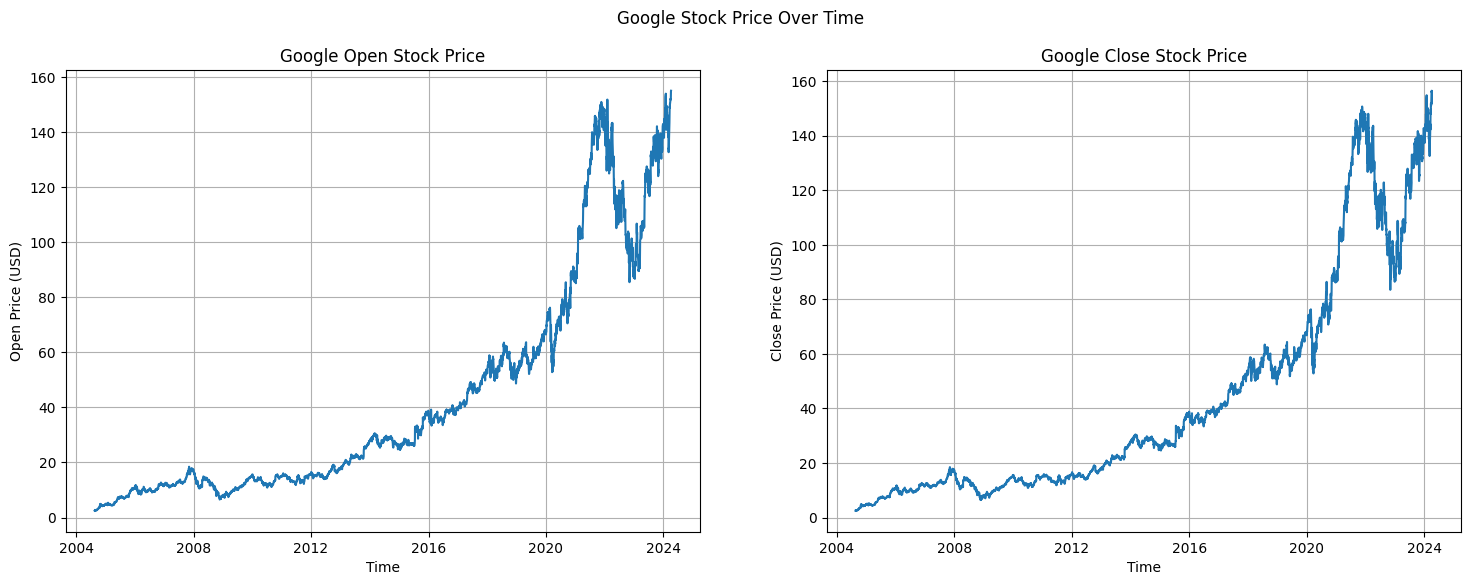

In [8]:
# Plot Open and Close price for the whole period
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
plt.plot(data["Date"], data["Open"])
plt.xlabel("Time")
plt.ylabel("Open Price (USD)")
plt.title("Google Open Stock Price")
plt.grid()

plt.subplot(1,2,2)
plt.plot(data["Date"], data["Close"])
plt.xlabel("Time")
plt.ylabel("Close Price (USD)")
plt.title("Google Close Stock Price")
plt.grid()

plt.suptitle("Google Stock Price Over Time")
plt.show()

The previous charts show an inconsistent behavior in the stock's performance over time, with a completely distinct trend during the past five years.

This means that the old historical data might not be relevant to the predictions, since it's most likely to represents a different period with outdated indicators that don't affect the current trend.

Accordingly, we will concentrate our analysis on the most recent five-year data, as it is expected to provide more accurate insights for predicting future trends.

In [18]:
# Select stock price records for the last five years, starting from 2019
data_5years = data[data["Date"].dt.year >= 2019]

# Check filtered data shape
data_5years.shape

(1258, 7)

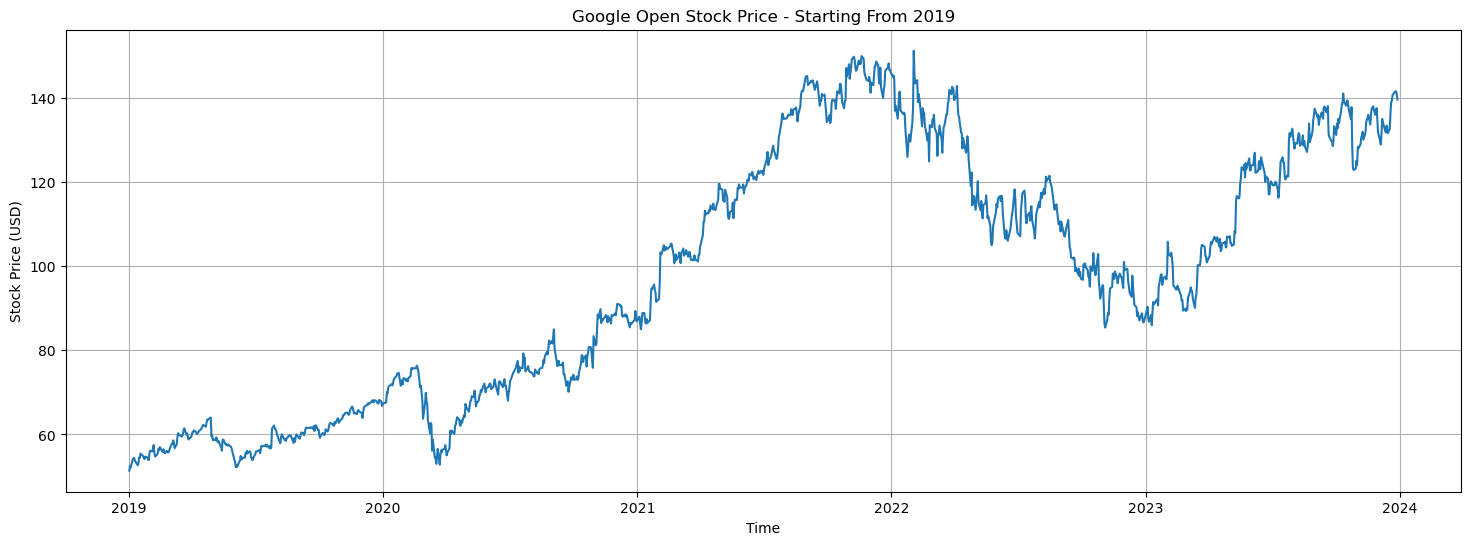

In [19]:
# Plot Open stock price performance in the last five years
plt.figure(figsize=(18,6))
plt.plot(data_5years["Date"], data_5years["Open"])
plt.xlabel("Time")
plt.ylabel("Stock Price (USD)")
plt.title("Google Open Stock Price - Starting From 2019")
plt.grid()

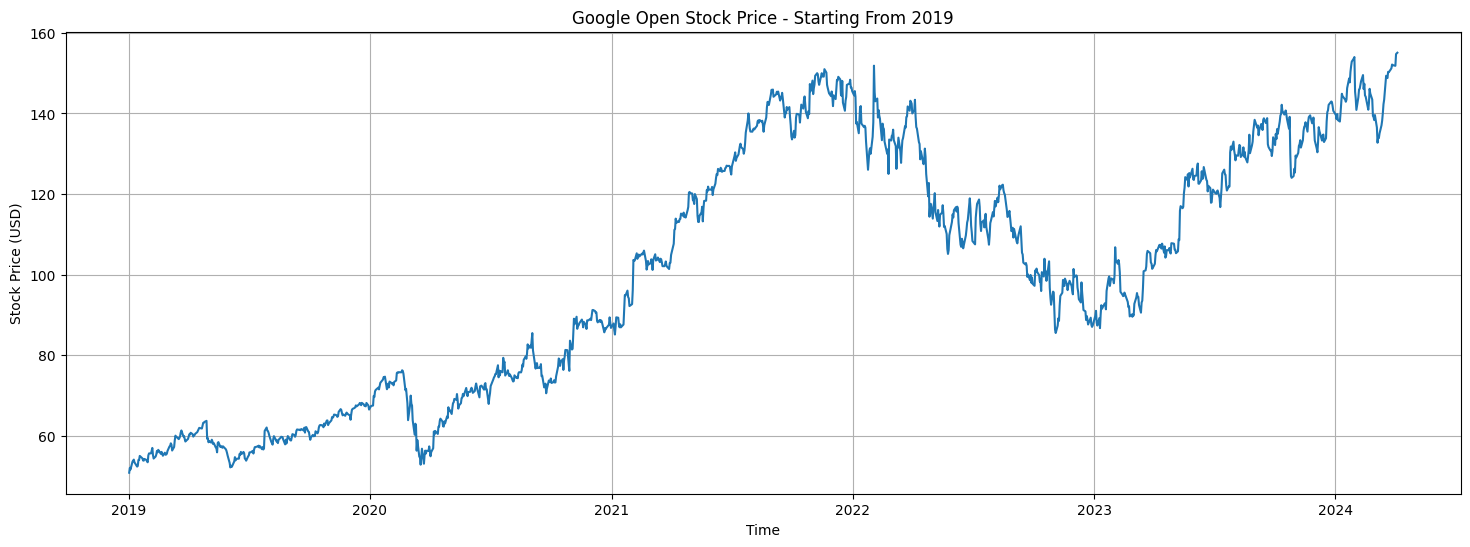

In [10]:
# Plot Open stock price performance in the last five years
plt.figure(figsize=(18,6))
plt.plot(data_5years["Date"], data_5years["Open"])
plt.xlabel("Time")
plt.ylabel("Stock Price (USD)")
plt.title("Google Open Stock Price - Starting From 2019")
plt.grid()

The selected period seems to be more relevant for analysis, as it's more likely to drive the stock performance with the impact of other external factors.

### 5. STORE FILTERED DATASET

In [20]:
# Prepare data file location
data_file_location = "..//data//interim//"
data_file_name = "google_stock_price_recent"
data_file_ext = "csv"

# Store dataset
data_5years.to_csv(data_file_location + data_file_name + "." + data_file_ext, index=None)